In [16]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import os
import umap

from neuropacks import ECOG
from pyuoi.decomposition import UoI_NMF
from sklearn.decomposition import NMF
from sklearn.cluster import DBSCAN

from utils import *
%matplotlib inline

In [2]:
data_path = '/storage/data/ecog/r32_b7.mat'
grid_path = '/storage/data/ecog/grdid.mat'

In [3]:
data_path = os.path.join(os.environ['HOME'], 'data/ecog/r32_b7.mat')
grid_path = os.path.join(os.environ['HOME'], 'data/ecog/grdid.mat')

In [4]:
ecog = ECOG(
    data_path=data_path,
    grid_path=grid_path
)

In [5]:
Y = ecog.get_response_matrix(
    bounds=(40, 60),
    band='HG'
)

In [6]:
# kill the dead indices
dead_indices = [19, 21, 0]

In [7]:
Y = Y + np.abs(np.min(Y, axis=0, keepdims=True))
Y[:, dead_indices] = 0
# Y[Y < 0] = 0

# Multiple Ranks

In [8]:
uoi = UoI_NMF(
    n_boots=30,
    ranks=[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    nmf_max_iter=1000)

In [13]:
uoi.nmf.set_params(alpha=3.0)

NMF(alpha=3.0, beta_loss='kullback-leibler', init='random', l1_ratio=0.0,
    max_iter=1000, n_components=None, random_state=None, shuffle=False,
    solver='mu', tol=0.0001, verbose=0)

In [9]:
uoi.fit(Y)

UoI_NMF(cluster=DBSCAN(algorithm='auto', eps=0.5, leaf_size=30,
                       metric='euclidean', metric_params=None, min_samples=15.0,
                       n_jobs=None, p=None),
        cons_meth=<function mean at 0x1129915f0>, db_algorithm=None,
        db_eps=None, db_leaf_size=None, db_metric=None, db_metric_params=None,
        db_min_samples=None, logger=None, n_boots=30,
        nmf=NMF(alpha=0.0, beta_loss='kullback-leibler', i...,
                l1_ratio=0.0, max_iter=1000, n_components=20, random_state=None,
                shuffle=False, solver='mu', tol=0.0001, verbose=0),
        nmf_beta_loss=None, nmf_init=None, nmf_max_iter=None, nmf_solver=None,
        nmf_tol=None,
        nnreg=<function UoI_NMF_Base.__initialize.<locals>.<lambda> at 0x1c2be5f9e0>,
        random_state=None,
        ranks=(8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20),
        use_dissimilarity=True)

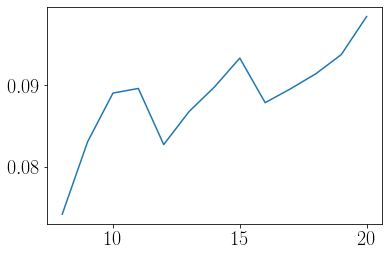

In [11]:
plt.plot([8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], uoi.dissimilarity_)

In [12]:
uoi.components_.shape

(5, 128)

In [13]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(uoi.bases_samples_)
clusters = uoi.bases_samples_labels_

In [19]:
uoi.cluster.fit(uoi.bases_samples_)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=15.0, n_jobs=None, p=None)

In [91]:
cluster = DBSCAN(eps=0.45, min_samples=15, leaf_size=60)
cluster.fit(uoi.bases_samples_)

DBSCAN(algorithm='auto', eps=0.45, leaf_size=60, metric='euclidean',
       metric_params=None, min_samples=15, n_jobs=None, p=None)

In [92]:
cluster.labels_

array([ 2,  0,  1,  2,  3,  4,  5,  6,  3,  5,  6,  2,  0,  0,  4,  1,  4,
        2,  1,  3,  1,  5,  0,  6,  0,  2,  0,  4,  3,  1,  5,  6,  2,  0,
        5,  4,  6,  0,  1,  3,  1,  0,  1,  2,  5,  6,  4,  0,  6,  5,  1,
        0,  3,  4,  2,  0,  2,  0,  0,  1,  1,  4,  3,  5,  6,  1,  3,  2,
        4,  0,  5,  0, -1,  0,  6,  2,  3,  4,  1,  5,  3,  1,  2,  4,  0,
        6,  5,  0,  1,  5,  1,  2,  2,  0,  4,  3,  4,  4,  2,  5,  2,  1,
        0,  3,  3,  0,  1,  2,  5,  3,  4,  0,  0,  2,  4,  3,  5,  6,  1,
        0,  3,  6,  2,  0,  4,  2,  1,  5,  1,  0,  2,  4,  5,  3,  0,  2,
        1,  6,  2,  4,  0,  0,  5,  3,  1,  0,  0,  3,  6,  2,  5,  4,  0,
        4,  5,  6,  3,  0,  2,  1,  4,  5,  6,  3,  2,  0,  1,  0,  1,  0,
        4,  2,  2,  3,  5,  0,  6,  3,  0,  6,  1,  5,  2,  4,  0,  3,  1,
        2,  4,  5,  0, -1,  1,  2,  0, -1,  0,  5,  3,  4,  2,  4,  6,  3,
        2,  5,  0,  1,  0,  4,  1,  5,  3,  2,  6,  0,  6,  3,  5,  1,  2,
       -1,  4,  0,  3,  5

In [93]:
colors = ['r', 'g', 'b', 'c', 'orange', 'purple', 'pink']

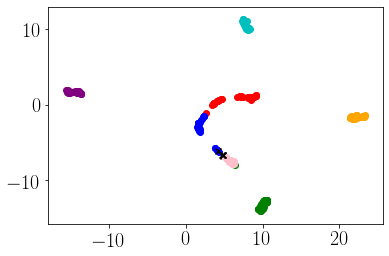

In [94]:
for idx, bases_samples in enumerate(uoi.bases_samples_):
    label = cluster.labels_[idx]
    if label == -1:
        plt.scatter(embedding[idx, 0], embedding[idx, 1], color='k', marker='x')
    else:
        plt.scatter(embedding[idx, 0], embedding[idx, 1], color=colors[label], marker='o')

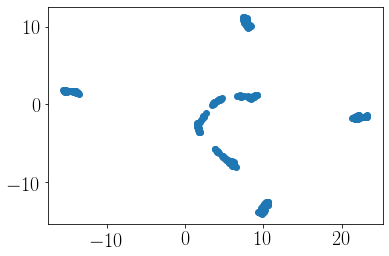

In [14]:
plt.scatter(embedding[:, 0], embedding[:, 1])

(<Figure size 1080x432 with 6 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c264d0690>,
       dtype=object))

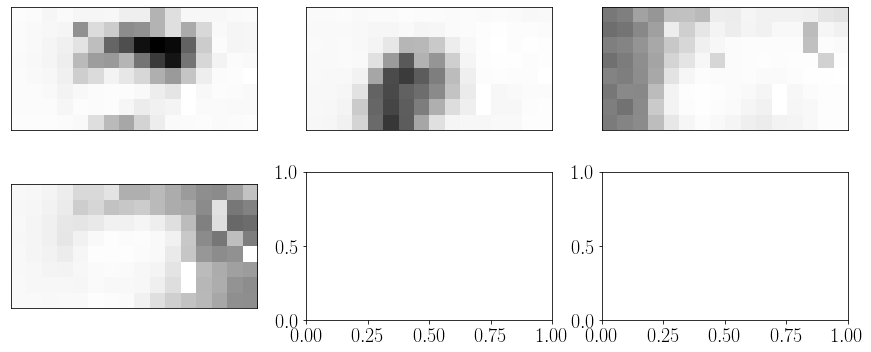

In [26]:
plot_ecog_bases(uoi.components_, ecog)

In [27]:
uoi.components_[0]

array([0.        , 0.01034227, 0.01369235, 0.00809528, 0.01466334,
       0.01169705, 0.00780947, 0.01280876, 0.00675941, 0.04050374,
       0.00921059, 0.01737598, 0.01517632, 0.0113981 , 0.00909569,
       0.00764439, 0.12605035, 0.10155401, 0.04278164, 0.        ,
       0.03433815, 0.        , 0.04247181, 0.0087933 , 0.07866828,
       0.14617876, 0.01483167, 0.05527519, 0.04470766, 0.02732319,
       0.08302683, 0.01209217, 0.13342774, 0.02245691, 0.11543934,
       0.00805377, 0.0662536 , 0.00908759, 0.01349935, 0.00762531,
       0.01019703, 0.02192568, 0.00726174, 0.00996309, 0.00664254,
       0.00855462, 0.00733692, 0.00834769, 0.05261312, 0.00664535,
       0.02974424, 0.00669825, 0.07127761, 0.0096305 , 0.09007047,
       0.01703899, 0.03764114, 0.02993196, 0.0195394 , 0.01373577,
       0.01305712, 0.00941184, 0.00939653, 0.00848167, 0.01107609,
       0.01006972, 0.01565367, 0.01386029, 0.02379884, 0.02385868,
       0.0408025 , 0.03535263, 0.11543945, 0.05870987, 0.14326